# Прогнозирование заказов такси

## Введение

Закзачик: Компания «Чётенькое такси»

Компании нужен прогноз заказов на следующий час, чтобы привлекать больше водителей в часы пиковой нагрузки. Для прогнозириования компания предоставила исторические данные о заказах такси в аэропортах.

### Цель проекта

Целью проекта является прогонозирование количества заказов такси в аэропортах на следующий час.

### Основные этапы

В проекте мы выполнили следующие этапы:
- загрузили и проанализировали предоставленные данные;
- подготовили данные для пронозирования;
- обучили две модели и сравнили их качество;
- проверили данные на тестовой выборке.

### Выводы

## Подготовка кода

### Загрузка библиотек

In [1]:
import pandas as pd
from os import path

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Функции

### Инициализация

## Загрузка и анализ данных

In [4]:
remote_path = 'https://code.s3.yandex.net/datasets/taxi.csv'
local_path = path.join('.', 'data', 'taxi.csv')

if path.isfile(local_path):
    data = pd.read_csv(local_path, index_col=0, parse_dates=[0])
else:
    data = pd.read_csv(remote_path, index_col=0, parse_dates=[0])
    if path.exists(path.dirname(local_path)):
        data.to_csv(local_path)
        
data.shape

(26496, 1)

Загрузили 26496 строк данных с одним признаком.

### Анализ данных

#### Обзорный анализ

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


В данных видим количество заказов `num_orders`, целочисленное, без пропусков. 

Диапазон времени от 0 часов 0 минут 1 марта 2018 до 23:50 31 августа 2018 года. Имеем данные за шесть месяцев.

In [6]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


В первых строчках видим 10-минутные интервалы между записями.

Проверим, что индекс монотонно возрастает.

In [7]:
data.index.is_monotonic_increasing

True

Проверим, что интервалы одинаковые и равны 10 минутам.

In [8]:
dt = data.reset_index().drop("num_orders", axis=1)
(dt["datetime"] - dt["datetime"].shift()).describe()

count              26495
mean     0 days 00:10:00
std      0 days 00:00:00
min      0 days 00:10:00
25%      0 days 00:10:00
50%      0 days 00:10:00
75%      0 days 00:10:00
max      0 days 00:10:00
Name: datetime, dtype: object

In [9]:
del(dt)

Инервалы одинаковые и равны 10 минутам.

Изучим распределение количества заказов.

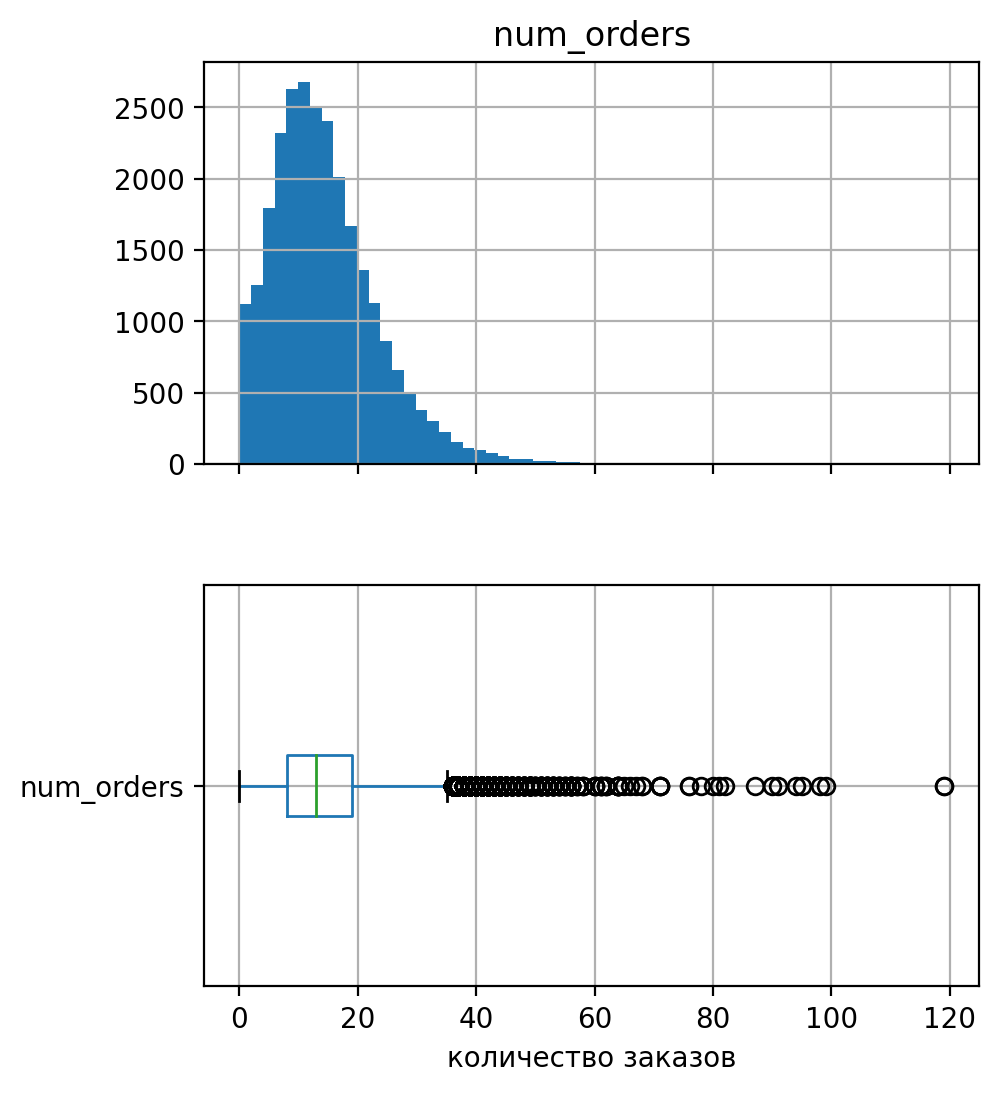

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5, 6), sharex=True)
data.hist(bins=60, ax=ax1)
data.boxplot(ax=ax2, vert=False)
ax2.set_xlabel("количество заказов")
plt.show()

In [11]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Распределение количества заказов близко к нормальному, смещено влево. 

В половине случаев количество заказов за 10 минут находится в интервале 8–19. Однако есть и вылеты с количеством заказов больше 35. Действительно видим пиковые периоды, когда количество заказов существенно выше среднего.

#### Анализ временного ряда

Поскольку перед нами стоит задача спрогнозировать количество заказов в следующий час, выполним ресемплирование данных по 1 часу.

In [12]:
data = data.resample("1H").sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Подготовка данных

## Обучение моделей

## Тестирование

## Вывод